<a href="https://colab.research.google.com/github/osvalcode/Seminario/blob/main/Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segmentación de clientes basado en datos recopilados a partir de tarjetas de crédito.
- URL de la base de datos seleccionada
https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m


- Breve descripción del dataset
El dataset contiene amplia información de cartera de clientes de tarjeta de crédito, con el objetivo de
predecir la pérdida de usuarios por parte una empresa. Este, incluye detalles tal como edad, sexo,
estado civil y categoría de ingresos, así como información sobre la relación de cada cliente con el
proveedor de la tarjeta de crédito, número de meses que han transcurrido desde la transacción
(préstamo) y los períodos de inactividad, además de datos del comportamiento de gastos de los
diferentes usuarios. A partir de este tipo de datos, se podría capturar información de interés que
ayude a determinar la estabilidad de la cuenta a largo plazo y así a futuro poder brindar soluciones a
clientes individuales según el comportamiento que se analice basado en los propios datos del
usuario.

Descripción de columnas del dataset

- CLIENTNUM: Unique identifier for each customer. (Integer)

- Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean)
- Customer_Age: Age of customer. (Integer)
- Gender: Gender of customer. (String)
- Dependent_count: Number of dependents that customer has. (Integer)
- Education_Level: Education level of customer. (String)
- Marital_Status: Marital status of customer. (String)
- Income_Category: Income category of customer. (String)
- Card_Category: Type of card held by customer. (String)
- Months_on_book: How long customer has been on the books. (Integer)
- Total_Relationship_Count: Total number of relationships customer has with the - credit card provider. (Integer)
- Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. (Integer)
- Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. (Integer)
- Credit_Limit: Credit limit of customer. (Integer)
- Total_Revolving_Bal: Total revolving balance of customer. (Integer)
- Avg_Open_To_Buy: Average open to buy ratio of customer. (Integer)
- Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1. (Integer)
- Total_Trans_Amt: Total transaction amount. (Integer)
- Total_Trans_Ct: Total transaction count. (Integer)
- Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1. (Integer)
- Avg_Utilization_Ratio: Average utilization ratio of customer. (Integer)
-Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such



**Librerías **

CARGA DE LIBRERIAS NECESARIAS

In [ ]:
# Carga de librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import MissingIndicator # Es una función que permite identificar los datos faltantes
from sklearn.impute import SimpleImputer # Método de imputación
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import median_abs_deviation # MAD
from scipy.special import entr # Entropía de Shannon
from sklearn.preprocessing import Normalizer # Librería para normalizar datos en una escala deseada
from sklearn.preprocessing import StandardScaler # Escalamiento estándar
from sklearn.preprocessing import RobustScaler # Escalamiento robusto
from sklearn.neighbors import LocalOutlierFactor #preparacion de datos

# Matemáticas y estadísticas
# ==============================================================================
import math
# Entrenamiento del modelo
#from sklearn.model_selection import train_test_split

#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Creación de modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

#random forest
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV



**FUNCIONES**

En esta parte iran las funciones a ser utilizadas para imputación y gráfica de información.

In [ ]:
# Este bloque de funciones se encarga de cambiar los valores nulos o indefinidos por el valor
# con más recurrencia entre sus vecinos
def get_recurrence(data):
  no_unknown = np.delete(valores_no_unknown, np.where(valores_no_unknown == 'Unknown'))
  return max(set(no_unknown), key=data.count)

def get_windows(data, index, neighbors):
  '''Obtiene la ventana de datos soble la cual se calculará la recurrencia'''
  if index - neighbors < 0:
    result = data[0:index+neighbors]
    result.pop(index)
  elif index + neighbors > len(data):
    result = data[index-neighbors:-1]
    result.pop(index)
  else:
    result = data[index-neighbors:index+neighbors+1]
    result.pop(index)

  return list(result)

def imputar_vecinos(data, neighbors):
  '''Se encarga de reemplazar los valores desconocidos por el valor más común entre la ventana de vecinos'''
  # Se obtienen los indices en donde los valores son desconocidos
  index = np.where(data=='Unknown')[0]
  result = data.copy() # Copia de la matriz de datos
  for idx in index:
    # Obtención de la ventana de vecinos
    window = get_windows(data, idx, neighbors)
    # print(window)
    # Valor más recurrente en la ventana de vecinos
    common_item = get_recurrence(window)
    # Reemplazo de los valores desconocidos por la recurrencia más común entre los vecinos
    result[idx] = common_item
  return result


In [ ]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

** CARGA DEL DATASET **

In [ ]:
# Carga de file csv
df_inicial = pd.read_csv('BankChurners.csv')

df_inicial.head()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [ ]:
# Renombramos las dos ultimas  columnas para que sea más fácil consultarla
df_inicial.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NB12mon1'}, inplace=True)
df_inicial.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'NB12mon2'}, inplace=True)
df_inicial.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  NB12mon1  NB12mon2  
0                  0.061  0.000093   0.99991  
1                  0.105  0.000057   0.99994  
2                  0.000  0.000021   0.99998  
3                  0.760  0.000134   0.99987  
4                  0.000  0.000022   0.99998  

[5 rows x 23 columns]

In [ ]:
# verificación tipos de datos
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Contador por cada datatype
df_inicial.dtypes.value_counts()

int64      10
float64     7
object      6
dtype: int64

In [ ]:
# Convertir de acuerdo a definición df algunos objects to string
columns_to_convert = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for column in columns_to_convert:
    if df_inicial[column].dtype != 'object':
        df_inicial[column] = df_inicial[column].astype('str')

#df_inicial['Gender'] = df_inicial['Gender'].astype('str')
#df_inicial['Education_Level'] = df_inicial['Education_Level'].astype('str')
#df_inicial['Marital_Status'] = df_inicial['Marital_Status'].astype('str')
#df_inicial['Income_Category'] = df_inicial['Income_Category'].astype('str')
#df_inicial['Card_Category'] = df_inicial['Card_Category'].astype('str')

df_inicial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#obtener valores unicos para la columna que debe ser booleana
valores_unicos = df_inicial['Attrition_Flag'].unique()
print(valores_unicos)

['Existing Customer' 'Attrited Customer']


In [ ]:
# convertir a boolean
#df_inicial['Attrition_Flag'] = df_inicial['Attrition_Flag'] .map({'Existing Customer': True, 'Attrited Customer': False})  # Replace string by boolean
df_inicial['Attrition_Flag'] = df_inicial['Attrition_Flag'] .map({'Existing Customer': 1, 'Attrited Customer': 0})  # Replace string by boolean
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Verificar el tipo de datos de todas las columnas
tipos_datos = df_inicial.dtypes.to_dict()
#'int64' indica un tipo de datos entero de 64 bits, 'O' indica un tipo de datos objeto (cadena), 'float64' indica un tipo de datos float de 64 bits y 'bool' indica un tipo de datos booleano

print(tipos_datos)

{'CLIENTNUM': dtype('int64'), 'Attrition_Flag': dtype('int64'), 'Customer_Age': dtype('int64'), 'Gender': dtype('O'), 'Dependent_count': dtype('int64'), 'Education_Level': dtype('O'), 'Marital_Status': dtype('O'), 'Income_Category': dtype('O'), 'Card_Category': dtype('O'), 'Months_on_book': dtype('int64'), 'Total_Relationship_Count': dtype('int64'), 'Months_Inactive_12_mon': dtype('int64'), 'Contacts_Count_12_mon': dtype('int64'), 'Credit_Limit': dtype('float64'), 'Total_Revolving_Bal': dtype('int64'), 'Avg_Open_To_Buy': dtype('float64'), 'Total_Amt_Chng_Q4_Q1': dtype('float64'), 'Total_Trans_Amt': dtype('int64'), 'Total_Trans_Ct': dtype('int64'), 'Total_Ct_Chng_Q4_Q1': dtype('float64'), 'Avg_Utilization_Ratio': dtype('float64'), 'NB12mon1': dtype('float64'), 'NB12mon2': dtype('float64')}


Exploración inicial de los datos
En este apartado, se debe cargar la base de datos y generar una exploración inicial, determinando si hay datos faltantes o no y generando un reporte de las estadísticas principales como la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada variable.

In [ ]:
#Exploración para determinar si hay dato faltante

L_Value_Unique=[]
for clm in df_inicial.columns:
    List_Iter=list(df_inicial[clm].value_counts().index)
    L_Value_Unique.append(List_Iter)
display(L_Value_Unique)
print(len(L_Value_Unique))

[[768805383,
  711784908,
  720133908,
  803197833,
  812222208,
  757634583,
  719362458,
  789331908,
  715616358,
  806900508,
  713985183,
  710098233,
  713508333,
  712176708,
  719724933,
  716537433,
  713186058,
  787558683,
  789601308,
  816078708,
  789241308,
  720210483,
  779577108,
  801497508,
  716131083,
  784734258,
  711122958,
  779508333,
  717699408,
  709329558,
  713115483,
  721222833,
  712682583,
  710051658,
  708606633,
  710862258,
  720072933,
  757527033,
  718002633,
  713941158,
  809966058,
  714724908,
  714124983,
  718031508,
  709732608,
  713466033,
  716369208,
  781143933,
  711337158,
  719973033,
  709100283,
  714196008,
  780272208,
  717849708,
  712437108,
  767802483,
  709064208,
  714343608,
  719350908,
  708086958,
  808950108,
  822056583,
  719050458,
  718021608,
  788870283,
  778272408,
  720079758,
  787457883,
  719884983,
  714585033,
  721480158,
  713981283,
  715328658,
  708918558,
  748194633,
  719323683,
  708611733,

23


In [ ]:
df_inicial.describe()

CLIENTNUM  Attrition_Flag  Customer_Age  Dependent_count  \
count  1.012700e+04    10127.000000  10127.000000     10127.000000   
mean   7.391776e+08        0.839340     46.325960         2.346203   
std    3.690378e+07        0.367235      8.016814         1.298908   
min    7.080821e+08        0.000000     26.000000         0.000000   
25%    7.130368e+08        1.000000     41.000000         1.000000   
50%    7.179264e+08        1.000000     46.000000         2.000000   
75%    7.731435e+08        1.000000     52.000000         3.000000   
max    8.283431e+08        1.000000     73.000000         5.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count    10127.000000              10127.000000            10127.000000   
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.000000   
25%         31.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio      NB12mon1      NB12mon2  
count         10127.000000           10127.000000  10127.000000  10127.000000  
mean              0.712222               0.274894      0.159997      0.840003  
std               0.238086               0.275691      0.365301      0.365301  
min               0.000000               0.000000      0.000008      0.000420  
25%               0.582000               0.023000      0.000099      0.999660  
50%               0.702000               0.176000      0.000181      0.999820  
75%               0.818000               0.503000      0.000337      0.999900  
max               3.714000               0.999000      0.999580      0.999990

In [ ]:
# para un mayor entendimiento de los valores se muestran sin los valores exponenciales
# Obtener la descripción del DataFrame
descripcion = df_inicial.describe()

# Formatear los números en el formato deseado (sin notación exponencial)
descripcion_formateada = descripcion.apply(lambda x: ['{:.2f}'.format(num) for num in x])

# Mostrar la descripción formateada
print(descripcion_formateada)

          CLIENTNUM Attrition_Flag Customer_Age Dependent_count  \
count      10127.00       10127.00     10127.00        10127.00   
mean   739177606.33           0.84        46.33            2.35   
std     36903783.45           0.37         8.02            1.30   
min    708082083.00           0.00        26.00            0.00   
25%    713036770.50           1.00        41.00            1.00   
50%    717926358.00           1.00        46.00            2.00   
75%    773143533.00           1.00        52.00            3.00   
max    828343083.00           1.00        73.00            5.00   

      Months_on_book Total_Relationship_Count Months_Inactive_12_mon  \
count       10127.00                 10127.00               10127.00   
mean           35.93                     3.81                   2.34   
std             7.99                     1.55                   1.01   
min            13.00                     1.00                   0.00   
25%            31.00                

In [ ]:
# Reemplazamos los datos ? por datos NaN o nulos
df_connulos = df_inicial.replace("?",np.nan)
df_connulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Identificar las características (columnas) del DataFrame donde hay datos faltantes.
Indicador = MissingIndicator(missing_values = np.nan)
Indicador.fit(df_connulos)
Datos_Indicador = Indicador.transform(df_connulos) # Realizamos una transformación Booleana de los datos para identificar los datos faltantes (True)
                                             # y los datos no faltantes (False)
print("Características donde hay datos faltantes: ", Indicador.features_)

Características donde hay datos faltantes:  []


De acuerdo al resultado anterior, no se evidencian características con datos faltantes.

In [ ]:
#valores unicos por cada dato string (['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])
for column in columns_to_convert:
    valores_unicos1 = df_connulos[column].unique()
    print(valores_unicos1)


['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
# Imprimir la cantidad de registros con Marital status igual a "Unknow"
print('Registros con Marital status Unknow:', (df_connulos['Marital_Status'] == 'Unknown').sum())
print('Registros con Education_Level Unknow:', (df_connulos['Education_Level'] == 'Unknown').sum())
print('Registros con Income_Category Unknow:',(df_connulos['Income_Category'] == 'Unknown').sum())

Registros con Marital status Unknow: 749
Registros con Education_Level Unknow: 1519
Registros con Income_Category Unknow: 1112


In [ ]:
# Obtener los índices de los registros con Marital_Status igual a "Unknow" (comprobación)
l_pos = df_connulos[df_connulos['Marital_Status'] == 'Unknown'].index.tolist()

# Imprimir la cantidad de registros con Marital_Status igual a "Unknow"
print('Registros con Marital_Status Unknow:', len(l_pos))


Registros con Marital_Status Unknow: 749


In [ ]:
# para la columna marital_status se va a imputar con el valor más frecuente dado el tipo de campo
# Imputación con valor más frecuente
valor_mas_frecuente = df_connulos['Marital_Status'].value_counts().idxmax()
print(valor_mas_frecuente)
df_imputado1 = df_connulos.copy()
for pos in l_pos:
    df_imputado1.loc[pos, 'Marital_Status'] = valor_mas_frecuente

Married


In [ ]:
# Se comprueba que ya no existan registros con Marital_Status='Unknow', el resultado debe ser cero
print('Registros con Marital status Unknow:', (df_imputado1['Marital_Status'] == 'Unknown').sum())
valores_unicos_marital = df_imputado1['Marital_Status'].unique()
print(valores_unicos_marital)


Registros con Marital status Unknow: 0
['Married' 'Single' 'Divorced']


In [ ]:
# para la columna education_level se va a realizar la imputacion con el vecino mas cercano
# esta tecnica generó diferente numero de errores debido a la existencia de datos categoricos entre otros.
# se usaran valores aleatorios
# Se Obtienen los valores únicos de la columna "Education_Level"
#valores_unicosE = df_imputado1['Education_Level'].unique()
#valores_no_unknown = df_imputado1['Education_Level'] != 'Unknown'
valores_no_unknown = df_imputado1['Education_Level'].unique()
valores_no_unknown1 = np.delete(valores_no_unknown, np.where(valores_no_unknown == 'Unknown'))
valores_only_unknown = valores_no_unknown[valores_no_unknown == 'Unknown']
#valores_unicos_no_unknown = np.logical_and(valores_unicosE, valores_no_unknown)

In [ ]:
print(valores_no_unknown1)
print(valores_only_unknown)
df_imputado1.head(15)

['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Unknown']


CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383               1            45      M                3   
1   818770008               1            49      F                5   
2   713982108               1            51      M                3   
3   769911858               1            40      F                4   
4   709106358               1            40      M                3   
5   713061558               1            44      M                2   
6   810347208               1            51      M                4   
7   818906208               1            32      M                0   
8   710930508               1            37      M                3   
9   719661558               1            48      M                2   
10  708790833               1            42      M                5   
11  710821833               1            65      M                1   
12  710599683               1            56      M                1   
13  816082233               1            35      M                3   
14  712396908               1            57      F                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Married  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
5         Graduate        Married     $40K - $60K          Blue   
6          Unknown        Married         $120K +          Gold   
7      High School        Married     $60K - $80K        Silver   
8       Uneducated         Single     $60K - $80K          Blue   
9         Graduate         Single    $80K - $120K          Blue   
10      Uneducated        Married         $120K +          Blue   
11         Unknown        Married     $40K - $60K          Blue   
12         College         Single    $80K - $120K          Blue   
13        Graduate        Married     $60K - $80K          Blue   
14        Graduate        Married  Less than $40K          Blue   

    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...       12691.0                  777          11914.0   
1               44  ...        8256.0                  864           7392.0   
2               36  ...        3418.0                    0           3418.0   
3               34  ...        3313.0                 2517            796.0   
4               21  ...        4716.0                    0           4716.0   
5               36  ...        4010.0                 1247           2763.0   
6               46  ...       34516.0                 2264          32252.0   
7               27  ...       29081.0                 1396          27685.0   
8               36  ...       22352.0                 2517          19835.0   
9               36  ...       11656.0                 1677           9979.0   
10              31  ...        6748.0                 1467           5281.0   
11              54  ...        9095.0                 1587           7508.0   
12              36  ...       11751.0                    0          11751.0   
13              30  ...        8547.0                 1666           6881.0   
14              48  ...        2436.0                  680           1756.0   

    Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  1.335             1144              42   
1                  1.541             1291              33   
2                  2.594             1887              20   
3                  1.405             1171              20   
4                  2.175              816              28   
5                  1.376             1088              24   
6                  1.975             1330              31   
7                  2.204             1538

In [ ]:
# Dividir el conjunto de datos en dos partes: con y sin valores nulos en la columna categórica
#data_with_values = df_imputado1.dropna(subset=['Education_Level'] != 'Unknown')
data_with_values = df_imputado1[df_imputado1['Education_Level'] != 'Unknown']
data_missing_values = df_imputado1[df_imputado1['Education_Level'] == 'Unknown']
print(data_missing_values)

       CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
6      810347208               1            51      M                4   
11     710821833               1            65      M                1   
15     714885258               1            44      M                4   
17     753327333               1            41      M                3   
23     811604133               1            47      F                4   
...          ...             ...           ...    ...              ...   
10090  712296408               1            36      F                3   
10094  716123283               1            59      M                1   
10095  789023508               1            46      M                3   
10118  713755458               0            50      M                1   
10123  710638233               0            41      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
6             Unknown        Married     

In [ ]:
# Imputación columna Education Level
df_imputado2 = df_imputado1.copy()
df_imputado2['Education_Level'] = imputar_vecinos(df_imputado2['Education_Level'], 5)
df_imputado2.head(15)

CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383               1            45      M                3   
1   818770008               1            49      F                5   
2   713982108               1            51      M                3   
3   769911858               1            40      F                4   
4   709106358               1            40      M                3   
5   713061558               1            44      M                2   
6   810347208               1            51      M                4   
7   818906208               1            32      M                0   
8   710930508               1            37      M                3   
9   719661558               1            48      M                2   
10  708790833               1            42      M                5   
11  710821833               1            65      M                1   
12  710599683               1            56      M                1   
13  816082233               1            35      M                3   
14  712396908               1            57      F                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Married  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
5         Graduate        Married     $40K - $60K          Blue   
6         Graduate        Married         $120K +          Gold   
7      High School        Married     $60K - $80K        Silver   
8       Uneducated         Single     $60K - $80K          Blue   
9         Graduate         Single    $80K - $120K          Blue   
10      Uneducated        Married         $120K +          Blue   
11        Graduate        Married     $40K - $60K          Blue   
12         College         Single    $80K - $120K          Blue   
13        Graduate        Married     $60K - $80K          Blue   
14        Graduate        Married  Less than $40K          Blue   

    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...       12691.0                  777          11914.0   
1               44  ...        8256.0                  864           7392.0   
2               36  ...        3418.0                    0           3418.0   
3               34  ...        3313.0                 2517            796.0   
4               21  ...        4716.0                    0           4716.0   
5               36  ...        4010.0                 1247           2763.0   
6               46  ...       34516.0                 2264          32252.0   
7               27  ...       29081.0                 1396          27685.0   
8               36  ...       22352.0                 2517          19835.0   
9               36  ...       11656.0                 1677           9979.0   
10              31  ...        6748.0                 1467           5281.0   
11              54  ...        9095.0                 1587           7508.0   
12              36  ...       11751.0                    0          11751.0   
13              30  ...        8547.0                 1666           6881.0   
14              48  ...        2436.0                  680           1756.0   

    Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  1.335             1144              42   
1                  1.541             1291              33   
2                  2.594             1887              20   
3                  1.405             1171              20   
4                  2.175              816              28   
5                  1.376             1088              24   
6                  1.975             1330              31   
7                  2.204             1538

In [ ]:
#igual tratamiento para la columna Income Category
df_imputado3 = df_imputado2.copy()
df_imputado3['Income_Category'] = imputar_vecinos(df_imputado3['Income_Category'], 5)
df_imputado3.head(15)

CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383               1            45      M                3   
1   818770008               1            49      F                5   
2   713982108               1            51      M                3   
3   769911858               1            40      F                4   
4   709106358               1            40      M                3   
5   713061558               1            44      M                2   
6   810347208               1            51      M                4   
7   818906208               1            32      M                0   
8   710930508               1            37      M                3   
9   719661558               1            48      M                2   
10  708790833               1            42      M                5   
11  710821833               1            65      M                1   
12  710599683               1            56      M                1   
13  816082233               1            35      M                3   
14  712396908               1            57      F                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Married  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
5         Graduate        Married     $40K - $60K          Blue   
6         Graduate        Married         $120K +          Gold   
7      High School        Married     $60K - $80K        Silver   
8       Uneducated         Single     $60K - $80K          Blue   
9         Graduate         Single    $80K - $120K          Blue   
10      Uneducated        Married         $120K +          Blue   
11        Graduate        Married     $40K - $60K          Blue   
12         College         Single    $80K - $120K          Blue   
13        Graduate        Married     $60K - $80K          Blue   
14        Graduate        Married  Less than $40K          Blue   

    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...       12691.0                  777          11914.0   
1               44  ...        8256.0                  864           7392.0   
2               36  ...        3418.0                    0           3418.0   
3               34  ...        3313.0                 2517            796.0   
4               21  ...        4716.0                    0           4716.0   
5               36  ...        4010.0                 1247           2763.0   
6               46  ...       34516.0                 2264          32252.0   
7               27  ...       29081.0                 1396          27685.0   
8               36  ...       22352.0                 2517          19835.0   
9               36  ...       11656.0                 1677           9979.0   
10              31  ...        6748.0                 1467           5281.0   
11              54  ...        9095.0                 1587           7508.0   
12              36  ...       11751.0                    0          11751.0   
13              30  ...        8547.0                 1666           6881.0   
14              48  ...        2436.0                  680           1756.0   

    Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  1.335             1144              42   
1                  1.541             1291              33   
2                  2.594             1887              20   
3                  1.405             1171              20   
4                  2.175              816              28   
5                  1.376             1088              24   
6                  1.975             1330              31   
7                  2.204             1538

In [ ]:
# Se verifican que ya no existan columnas con valores Unknown
print('Registros con Marital status Unknow:', (df_imputado3['Marital_Status'] == 'Unknown').sum())
print('Registros con Education_Level Unknow:', (df_imputado3['Education_Level'] == 'Unknown').sum())
print('Registros con Income_Category Unknow:',(df_imputado3['Income_Category'] == 'Unknown').sum())

Registros con Marital status Unknow: 0
Registros con Education_Level Unknow: 0
Registros con Income_Category Unknow: 0


In [ ]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
df_imputado3.loc[df_imputado3.duplicated()]

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, NB12mon1, NB12mon2]
Index: []

[0 rows x 23 columns]

In [ ]:
# borrado de columnas no aportan al modelo
df_imputado3.drop(['CLIENTNUM','NB12mon1','NB12mon2'], axis='columns', inplace=True)

In [ ]:
# codigo nuevo, se genera matriz de correlación para validar si hay columnas correlacionadas y eliminar alguna de ellas
corr = df_imputado3.corr()

corr.style.background_gradient(cmap='BuGn')

<ipython-input-30-43ab31187223>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_imputado3.corr()


In [ ]:
#Borrando columnas que no se emplearán ultimo codigo adicionado ver esta linea

#df_imputado3.drop(['CLIENTNUM'], axis='columns', inplace=True)

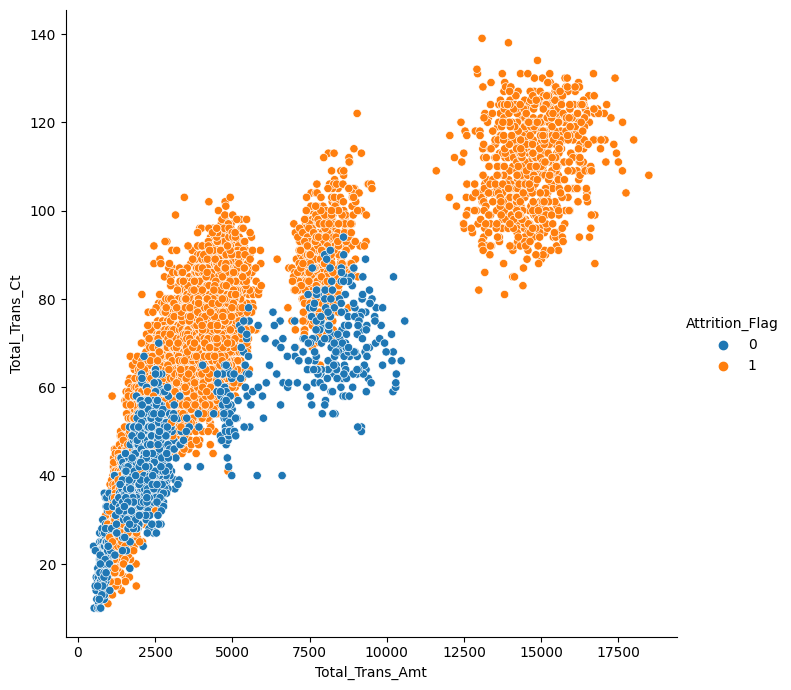

In [ ]:
# de la matriz anterior se observa que las variables más correlacionadas con la variable destino(Attrition_Flag) son
# Total_Trans_Ct y Total_Ct_Chng_Q4_Q1
#visualizemos estas variables en un diagrama de dispersion
sns.relplot(data=df_imputado3, kind='scatter', x='Total_Trans_Amt', y='Total_Trans_Ct',hue='Attrition_Flag', height=7)



un hallazgo interesante es que despues de cierta cantidad de transacciones, no hay abandono de clientes , recordemos el significado de los valores
Existing Customer': 1,
'Attrited Customer': 0

In [ ]:
# Eliminacion de registros duplicados
df_imputado3 = df_imputado3.drop_duplicates()
# se reinicia el indice
df_imputado3.reset_index(drop=True, inplace=True)

df_imputado3.info()
#se observa que no hubo registros duplicados( numero rows 10127)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Visualizacion de datos

Variables de entrada

In [ ]:
#Lista de variables categóricas
catCols = df_imputado3.select_dtypes(include = ["object", "boolean",'category']).columns.tolist()
df_imputado3[catCols].head()

Gender Education_Level Marital_Status Income_Category Card_Category
0      M     High School        Married     $60K - $80K          Blue
1      F        Graduate         Single  Less than $40K          Blue
2      M        Graduate        Married    $80K - $120K          Blue
3      F     High School        Married  Less than $40K          Blue
4      M      Uneducated        Married     $60K - $80K          Blue

In [ ]:
# Lista de variables númericas
numCols=df_imputado3.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
df_imputado3[numCols].head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               1            45                3              39   
1               1            49                5              44   
2               1            51                3              36   
3               1            40                4              34   
4               1            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

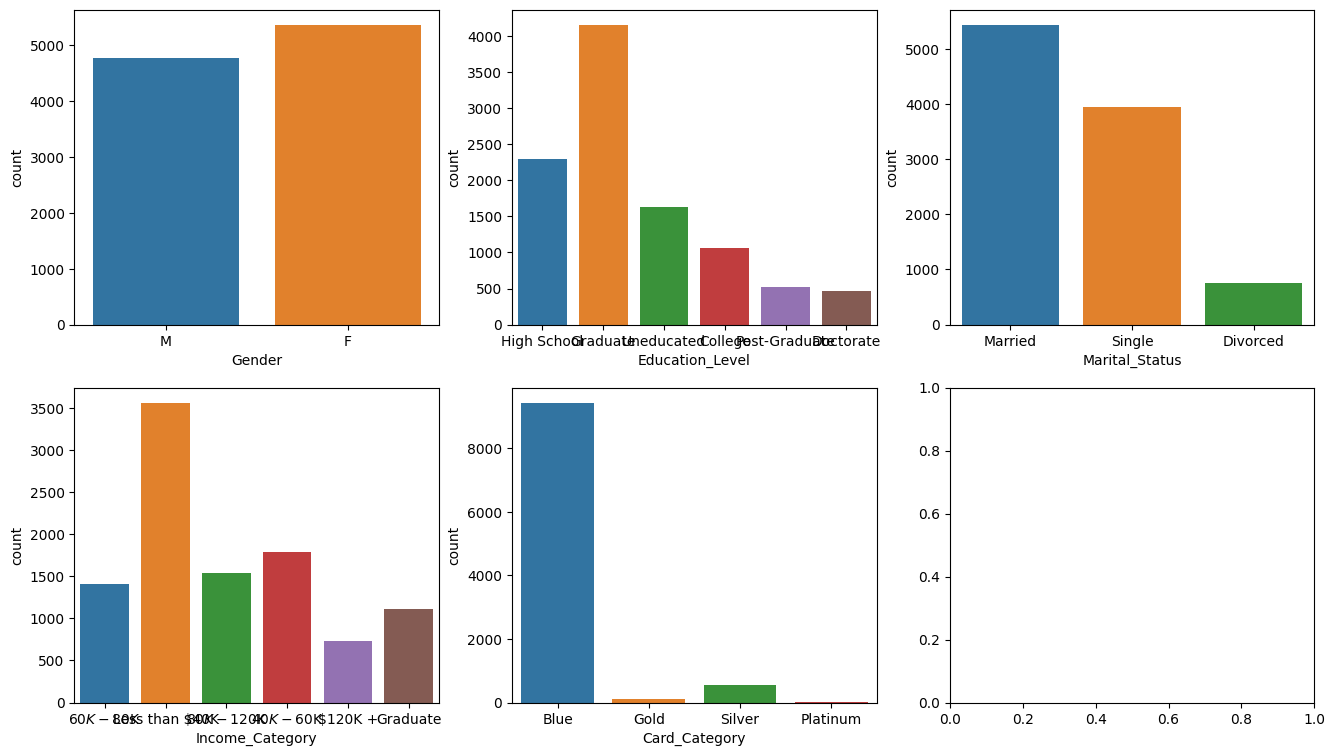

In [ ]:
# Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(df_imputado3,catCols,3,2,'c',None,(16,9))

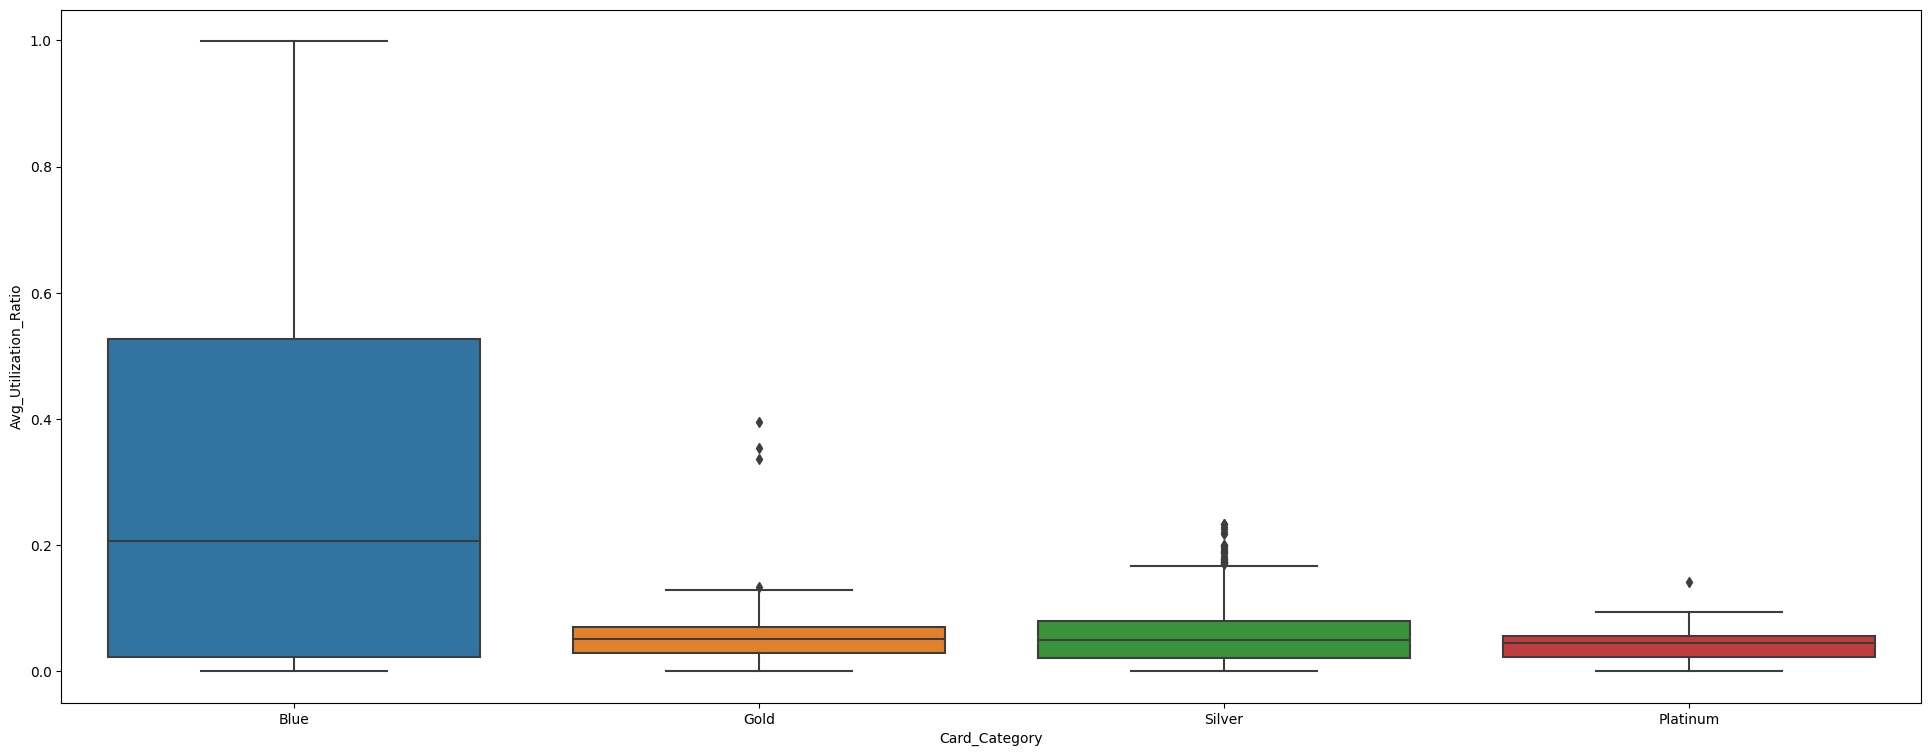

In [ ]:
#Visualización por medio de gráficos de caja de bigotes para la variable Card_Category con respecto a Avg_Utilization_Ratio
plot_multiples_graficas(df_imputado3,['Card_Category'], 1, 1, 'b', 'Avg_Utilization_Ratio', (24,9))

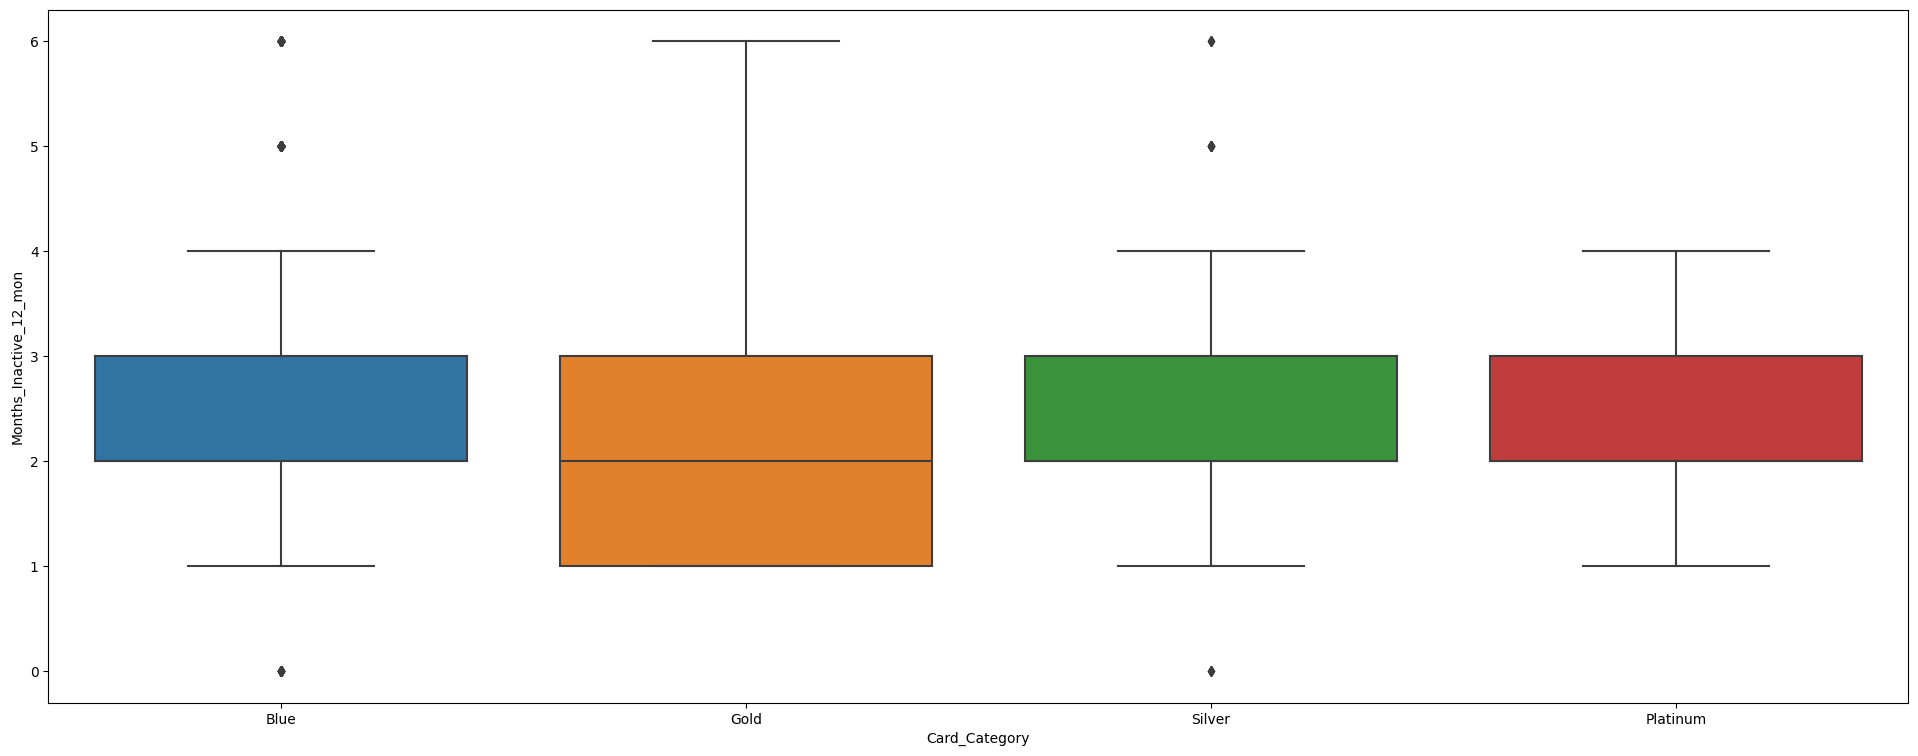

In [ ]:
#Visualización por medio de gráficos de caja de bigotes para la variable Card_Category con respecto a Avg_Utilization_Ratio
plot_multiples_graficas(df_imputado3,['Card_Category'], 1, 1, 'b', 'Months_Inactive_12_mon', (24,9))

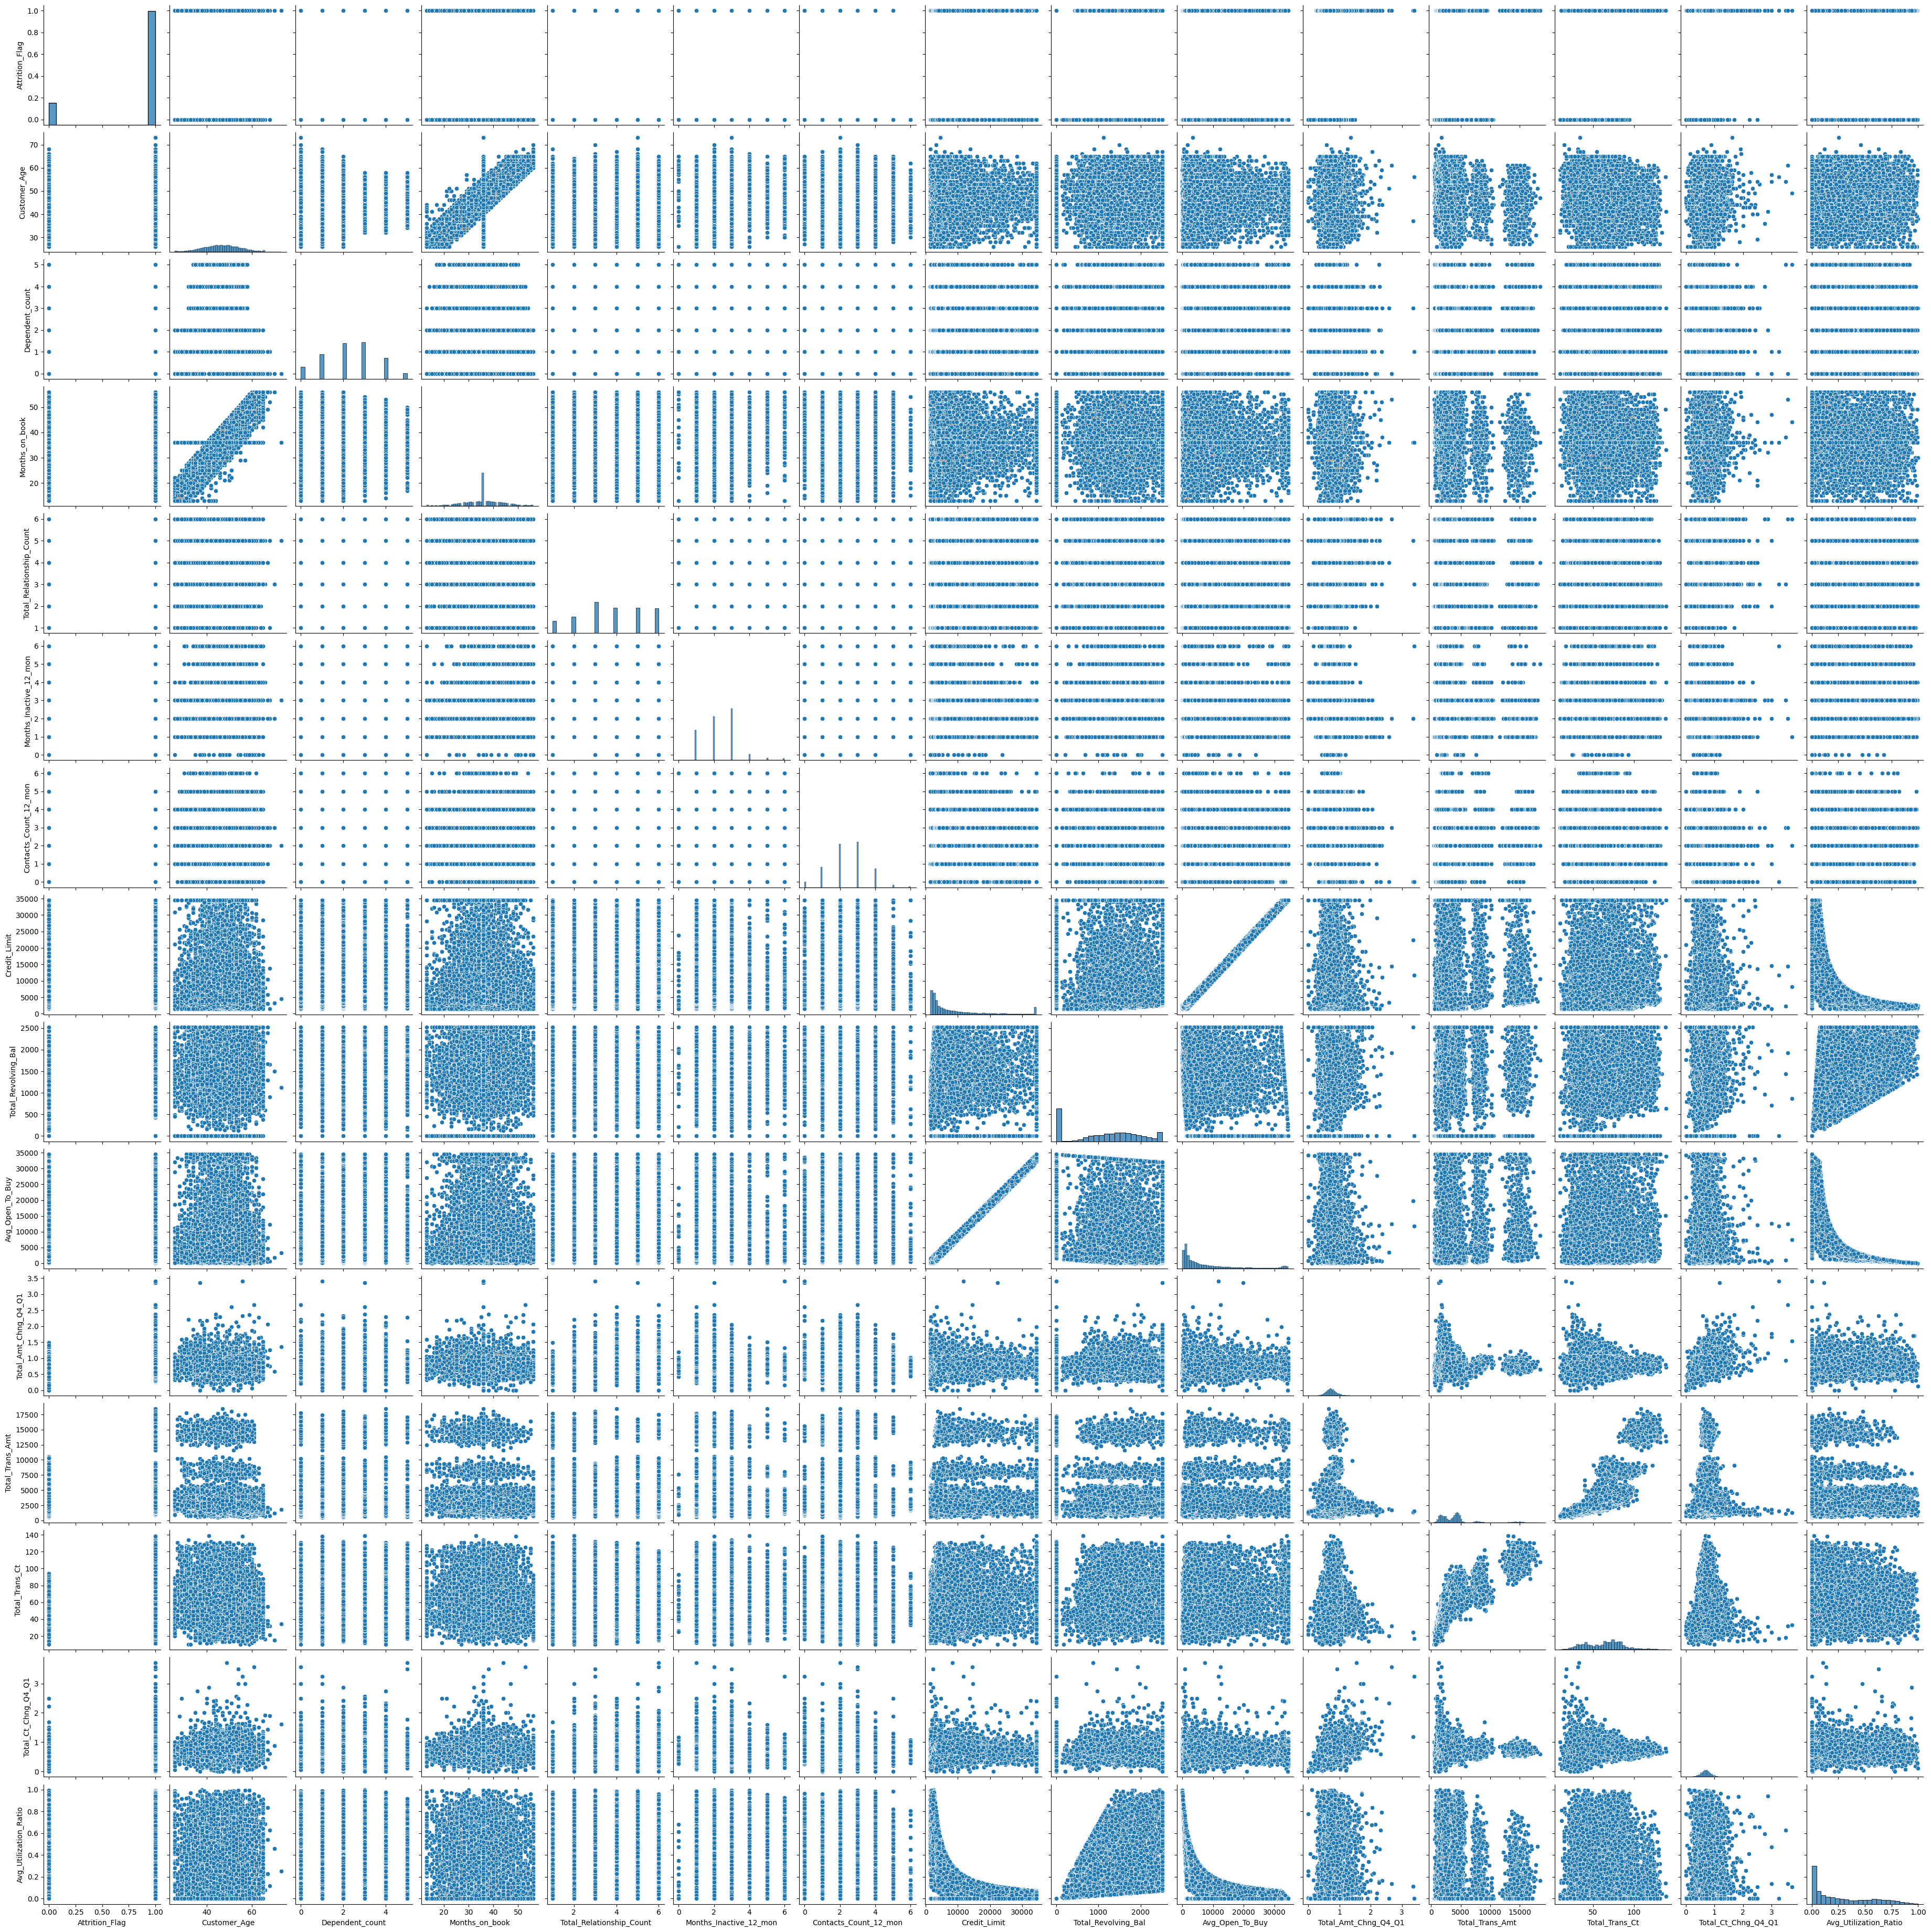

In [ ]:
# Visualización de variables numéricas
sns.pairplot(df_imputado3[numCols])
plt.show()

In [ ]:
#utilización de LocalOutlierFactor con 5 vecinos para identificar valores atípicos en las variables
# crear un objeto LocalOutlierFactor con n_neighbors=14
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# identificar los valires atípicos por medio de lof
y_pred = lof.fit_predict(df_imputado3[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', df_imputado3[outliers].index.tolist())

Indices de valores atípicos:  [3, 4, 6, 8, 17, 21, 22, 29, 37, 39, 45, 53, 54, 57, 61, 67, 69, 87, 99, 104, 106, 109, 120, 127, 130, 135, 144, 146, 168, 179, 186, 211, 226, 234, 235, 236, 253, 256, 258, 261, 269, 271, 274, 287, 288, 300, 310, 312, 314, 337, 348, 355, 363, 369, 372, 386, 388, 401, 419, 423, 426, 433, 447, 463, 473, 478, 485, 503, 509, 527, 540, 548, 549, 550, 556, 558, 568, 580, 583, 589, 593, 598, 606, 632, 637, 649, 653, 656, 657, 659, 679, 681, 689, 691, 698, 703, 708, 709, 714, 731, 735, 741, 745, 752, 776, 778, 784, 797, 815, 819, 822, 843, 853, 854, 855, 859, 875, 890, 899, 905, 906, 921, 922, 926, 930, 994, 1003, 1005, 1014, 1025, 1036, 1044, 1048, 1064, 1085, 1088, 1097, 1120, 1152, 1154, 1169, 1170, 1176, 1180, 1186, 1194, 1206, 1218, 1257, 1258, 1262, 1268, 1270, 1284, 1293, 1294, 1312, 1313, 1328, 1351, 1360, 1368, 1401, 1402, 1417, 1428, 1438, 1448, 1469, 1475, 1477, 1501, 1512, 1533, 1565, 1593, 1598, 1611, 1634, 1665, 1693, 1700, 1726, 1747, 1752, 1761, 17

In [ ]:
# Eliminar los valores atípicos del dataframe
df_imputado4 = df_imputado3.loc[~outliers]
df_imputado4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9114 entries, 0 to 10125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9114 non-null   int64  
 1   Customer_Age              9114 non-null   int64  
 2   Gender                    9114 non-null   object 
 3   Dependent_count           9114 non-null   int64  
 4   Education_Level           9114 non-null   object 
 5   Marital_Status            9114 non-null   object 
 6   Income_Category           9114 non-null   object 
 7   Card_Category             9114 non-null   object 
 8   Months_on_book            9114 non-null   int64  
 9   Total_Relationship_Count  9114 non-null   int64  
 10  Months_Inactive_12_mon    9114 non-null   int64  
 11  Contacts_Count_12_mon     9114 non-null   int64  
 12  Credit_Limit              9114 non-null   float64
 13  Total_Revolving_Bal       9114 non-null   int64  
 14  Avg_Ope

In [ ]:
#Eliminar la variable de salida de la lista de variable numéricas
#numCols.remove('Attrition_Flag') ojo, ultimo cambio comentariado, es necesario este campo como vble de salida

VAriable de Sálida

In [ ]:
# Distriución de la variable de salida

df_imputado4.groupby('Attrition_Flag').Attrition_Flag.count().sort_values(ascending=False)

Attrition_Flag
1    7763
0    1351
Name: Attrition_Flag, dtype: int64

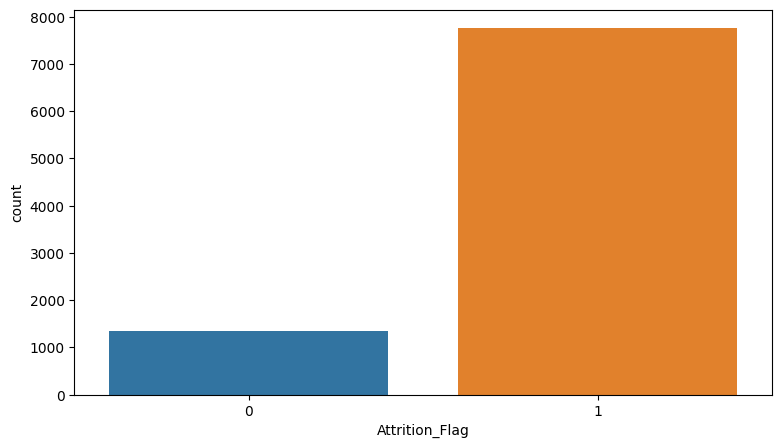

In [ ]:
variableaimprimir ={'Attrition_Flag'}
plot_multiples_graficas(df_imputado4,variableaimprimir,1,1,'c',None,(9,5))

Significado de los valores:
'Attrited Customer': 0
'Existing Customer': 1


Preparación de datos

In [ ]:
df_imputado4.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# codigo nuevo desde aca
# se separa el df para tener los datos cuantitativos en un dataframe y los cuantitativos en otro
# df categorico
df_categorico=df_imputado4[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9114 entries, 0 to 10125
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           9114 non-null   object
 1   Education_Level  9114 non-null   object
 2   Marital_Status   9114 non-null   object
 3   Income_Category  9114 non-null   object
 4   Card_Category    9114 non-null   object
dtypes: object(5)
memory usage: 427.2+ KB


In [ ]:
#Se separa el df para tener los datos cuantitativos en un dataframe y los cuantitativos en otro
#df_cuantitativo=df[['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']]
df_cuantitativo = df_imputado4[['Attrition_Flag','Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
df_cuantitativo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9114 entries, 0 to 10125
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9114 non-null   int64  
 1   Customer_Age              9114 non-null   int64  
 2   Dependent_count           9114 non-null   int64  
 3   Months_on_book            9114 non-null   int64  
 4   Total_Relationship_Count  9114 non-null   int64  
 5   Months_Inactive_12_mon    9114 non-null   int64  
 6   Contacts_Count_12_mon     9114 non-null   int64  
 7   Credit_Limit              9114 non-null   float64
 8   Total_Revolving_Bal       9114 non-null   int64  
 9   Avg_Open_To_Buy           9114 non-null   float64
 10  Total_Amt_Chng_Q4_Q1      9114 non-null   float64
 11  Total_Trans_Amt           9114 non-null   int64  
 12  Total_Trans_Ct            9114 non-null   int64  
 13  Total_Ct_Chng_Q4_Q1       9114 non-null   float64
 14  Avg_Uti

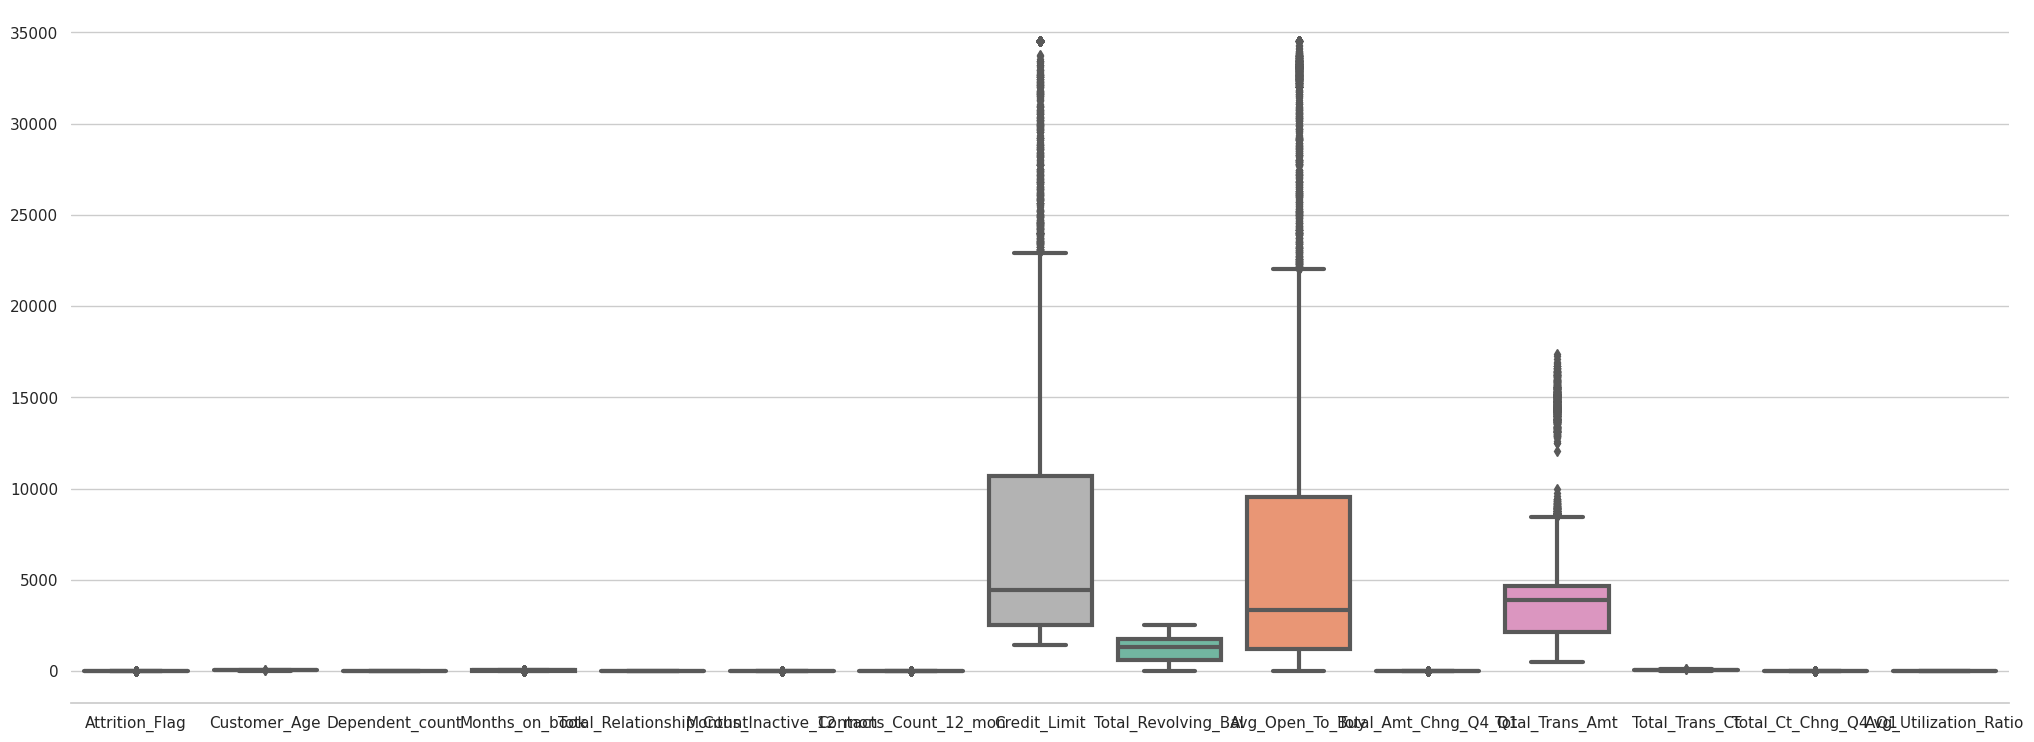

In [ ]:
# Se realiza un diagrama de cajas inicial para observar la distribución de los datos numéricos
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = df_cuantitativo, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

**Se escalan los datos para estandarizarlos**

In [ ]:
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1))
nombres = df_cuantitativo.columns
Datos_Min_Max = MinMax.fit_transform(df_cuantitativo)
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)

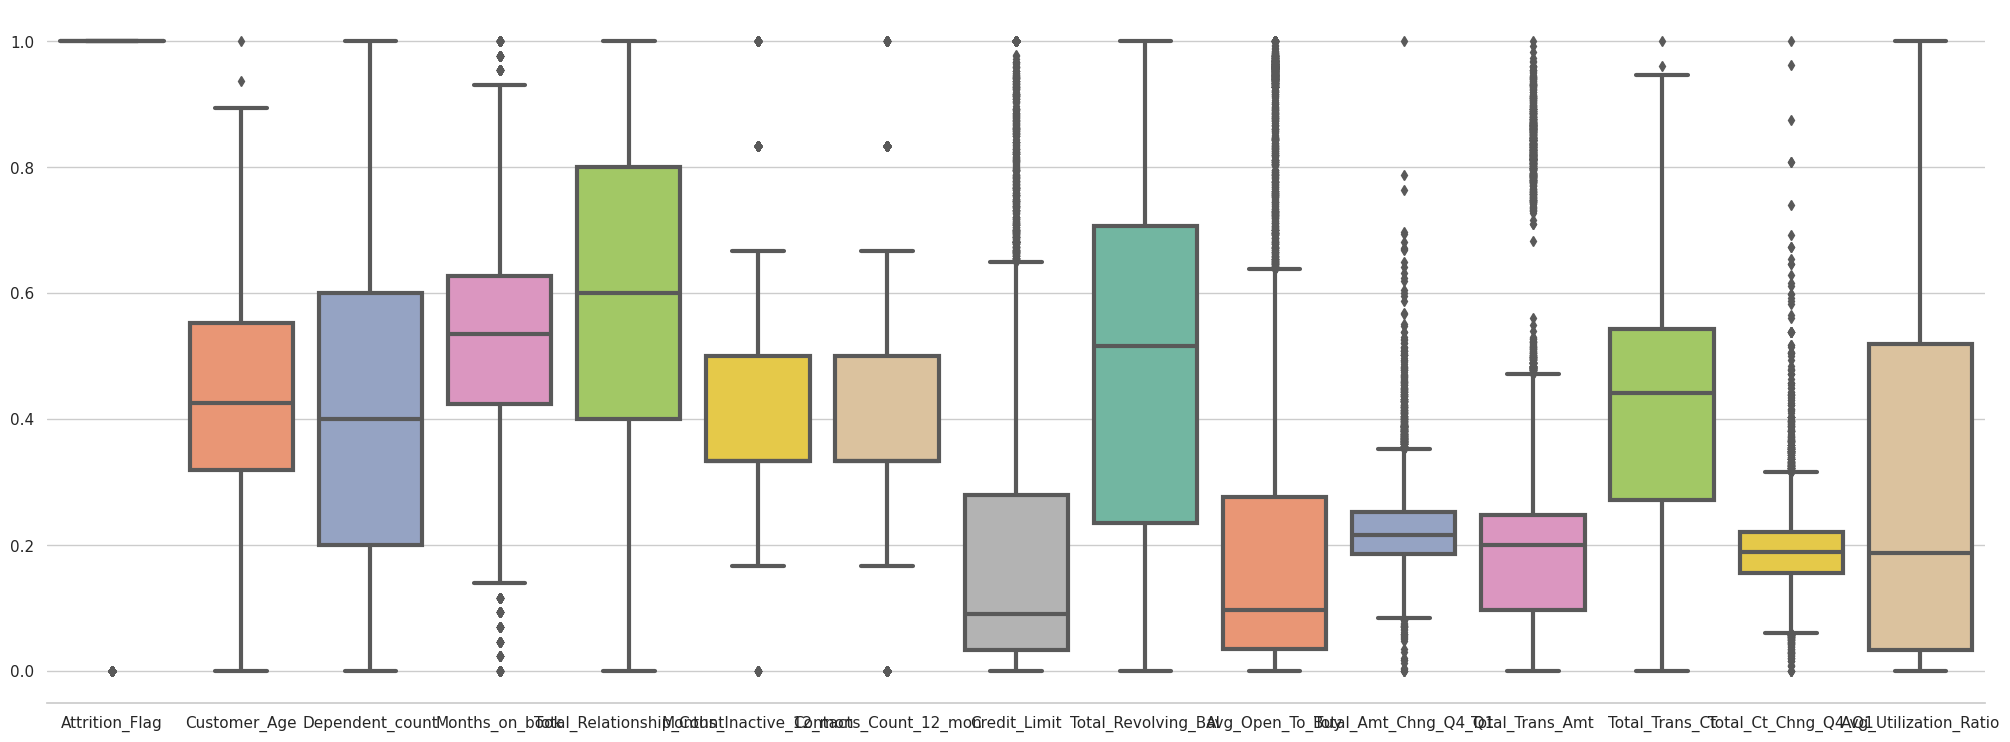

In [ ]:
#Se realiza un diagrama de cajas a los datos normalizados
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

In [ ]:
#unir dataframe de datos categóricos con datos numérocos ya escalados

df =pd.concat([Datos_Min_Max,df_categorico], axis=1)
df

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0                 1.0      0.404255              0.6        0.604651   
1                 1.0      0.489362              1.0        0.720930   
2                 1.0      0.531915              0.6        0.534884   
3                 1.0      0.382979              0.4        0.534884   
4                 1.0      0.127660              0.0        0.325581   
...               ...           ...              ...             ...   
10120             NaN           NaN              NaN             NaN   
10121             NaN           NaN              NaN             NaN   
10122             NaN           NaN              NaN             NaN   
10123             NaN           NaN              NaN             NaN   
10125             NaN           NaN              NaN             NaN   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                           0.8                0.166667   
1                           1.0                0.166667   
2                           0.6                0.166667   
3                           0.4                0.166667   
4                           0.2                0.333333   
...                         ...                     ...   
10120                       NaN                     NaN   
10121                       NaN                     NaN   
10122                       NaN                     NaN   
10123                       NaN                     NaN   
10125                       NaN                     NaN   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.500000      0.340190             0.308701   
1                   0.333333      0.206112             0.343266   
2                   0.000000      0.059850             0.000000   
3                   0.333333      0.077747             0.495431   
4                   0.333333      0.835690             0.554629   
...                      ...           ...                  ...   
10120                    NaN           NaN                  NaN   
10121                    NaN           NaN                  NaN   
10122                    NaN           NaN                  NaN   
10123                    NaN           NaN                  NaN   
10125                    NaN           NaN                  NaN   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.345116              0.392994         0.037559        0.248062   
1             0.214093              0.453636         0.046268        0.178295   
2             0.098948              0.763615         0.081576        0.077519   
3             0.079970              0.405063         0.034242        0.108527   
4             0.802075              0.648808         0.060900        0.201550   
...                ...                   ...              ...             ...   
10120              NaN                   NaN              NaN             NaN   
10121              NaN                   NaN              NaN             NaN   
10122              NaN                   NaN              NaN             NaN   
10123              NaN                   NaN              NaN             NaN   
10125              NaN                   NaN              NaN             NaN   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Gender Education_Level  \
0                 0.437534               0.061061      M     High School   
1                 1.000000               0.105105      F        Graduate   
2                 0.628164               0.000000      M        Graduate   
3                 0.227787               0.311311    NaN             NaN   
4                 0.192246               0.048048    NaN             NaN   
...                    ...                    ...    ...             ...   
10120                  NaN                    NaN      M     High School   
10121                  NaN                    N

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9931 entries, 0 to 10125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9114 non-null   float64
 1   Customer_Age              9114 non-null   float64
 2   Dependent_count           9114 non-null   float64
 3   Months_on_book            9114 non-null   float64
 4   Total_Relationship_Count  9114 non-null   float64
 5   Months_Inactive_12_mon    9114 non-null   float64
 6   Contacts_Count_12_mon     9114 non-null   float64
 7   Credit_Limit              9114 non-null   float64
 8   Total_Revolving_Bal       9114 non-null   float64
 9   Avg_Open_To_Buy           9114 non-null   float64
 10  Total_Amt_Chng_Q4_Q1      9114 non-null   float64
 11  Total_Trans_Amt           9114 non-null   float64
 12  Total_Trans_Ct            9114 non-null   float64
 13  Total_Ct_Chng_Q4_Q1       9114 non-null   float64
 14  Avg_Uti

In [ ]:
df.describe()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count     9114.000000   9114.000000      9114.000000     9114.000000   
mean         0.851767      0.432636         0.469146        0.533483   
std          0.355351      0.170472         0.259752        0.185808   
min          0.000000      0.000000         0.000000        0.000000   
25%          1.000000      0.319149         0.200000        0.424419   
50%          1.000000      0.425532         0.400000        0.534884   
75%          1.000000      0.553191         0.600000        0.627907   
max          1.000000      1.000000         1.000000        1.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               9114.000000             9114.000000   
mean                   0.567896                0.389657   
std                    0.308667                0.169065   
min                    0.000000                0.000000   
25%                    0.400000                0.333333   
50%                    0.600000                0.333333   
75%                    0.800000                0.500000   
max                    1.000000                1.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            9114.000000   9114.000000          9114.000000   
mean                0.409132      0.211035             0.468622   
std                 0.184470      0.267561             0.317301   
min                 0.000000      0.000000             0.000000   
25%                 0.333333      0.033344             0.235300   
50%                 0.333333      0.091110             0.516091   
75%                 0.500000      0.279961             0.707092   
max                 1.000000      1.000000             1.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      9114.000000           9114.000000      9114.000000     9114.000000   
mean          0.209670              0.223086         0.225800        0.424456   
std           0.256639              0.063882         0.194243        0.178539   
min           0.000000              0.000000         0.000000        0.000000   
25%           0.035689              0.185163         0.097512        0.271318   
50%           0.097108              0.215926         0.200059        0.441860   
75%           0.276454              0.251987         0.247156        0.542636   
max           1.000000              1.000000         1.000000        1.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          9114.000000            9114.000000  
mean              0.191765               0.283892  
std               0.063505               0.276971  
min               0.000000               0.000000  
25%               0.156435               0.033283  
50%               0.188476               0.188188  
75%               0.220248               0.519520  
max               1.000000               1.000000

** Detección de datos atípicos **

In [ ]:
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean')

Filtrado = LOF.fit_predict(Datos_Min_Max)
NOF = LOF.negative_outlier_factor_

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min())
ground_truth = np.ones(len(Datos_Min_Max), dtype = int)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [ ]:
print("Número de muestras o filas con datos atípicos: ", n_errors)

Número de muestras o filas con datos atípicos:  34


In [ ]:
pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_LOF = df.loc[pos, :]
print(df.shape) # Tamaño de los datos originales
print(datos_sin_outilers_LOF.shape) # Tamaño de los datos sin outliers

#Datos sin outliers y sin normalizar

#data_ori = df_cuantitativo.loc[pos, : ]

(9931, 20)
(9080, 20)


In [ ]:
numCols

['Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
H_1 = entr(Datos_Min_Max[numCols])
H_2 = entr(datos_sin_outilers_LOF[numCols])

entropia_normalizada_1 = H_1.sum()/Datos_Min_Max.shape[0]
entropia_normalizada_2 = H_2.sum()/datos_sin_outilers_LOF.shape[0]

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia LOF'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2], axis = 1)

display(Comparacion_entropias)

Entropia Original  Entropia LOF
Attrition_Flag                     0.000000      0.000000
Customer_Age                       0.325007      0.325139
Dependent_count                    0.264993      0.265299
Months_on_book                     0.298678      0.298902
Total_Relationship_Count           0.214587      0.214691
Months_Inactive_12_mon             0.330243      0.330848
Contacts_Count_12_mon              0.316352      0.316623
Credit_Limit                       0.189920      0.189913
Total_Revolving_Bal                0.201855      0.202121
Avg_Open_To_Buy                    0.200731      0.200670
Total_Amt_Chng_Q4_Q1               0.326111      0.326145
Total_Trans_Amt                    0.270879      0.271049
Total_Trans_Ct                     0.323845      0.323971
Total_Ct_Chng_Q4_Q1                0.306838      0.306967
Avg_Utilization_Ratio              0.206680      0.207015

In [ ]:
DatosFiltrados = datos_sin_outilers_LOF.copy()
Features = DatosFiltrados[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]


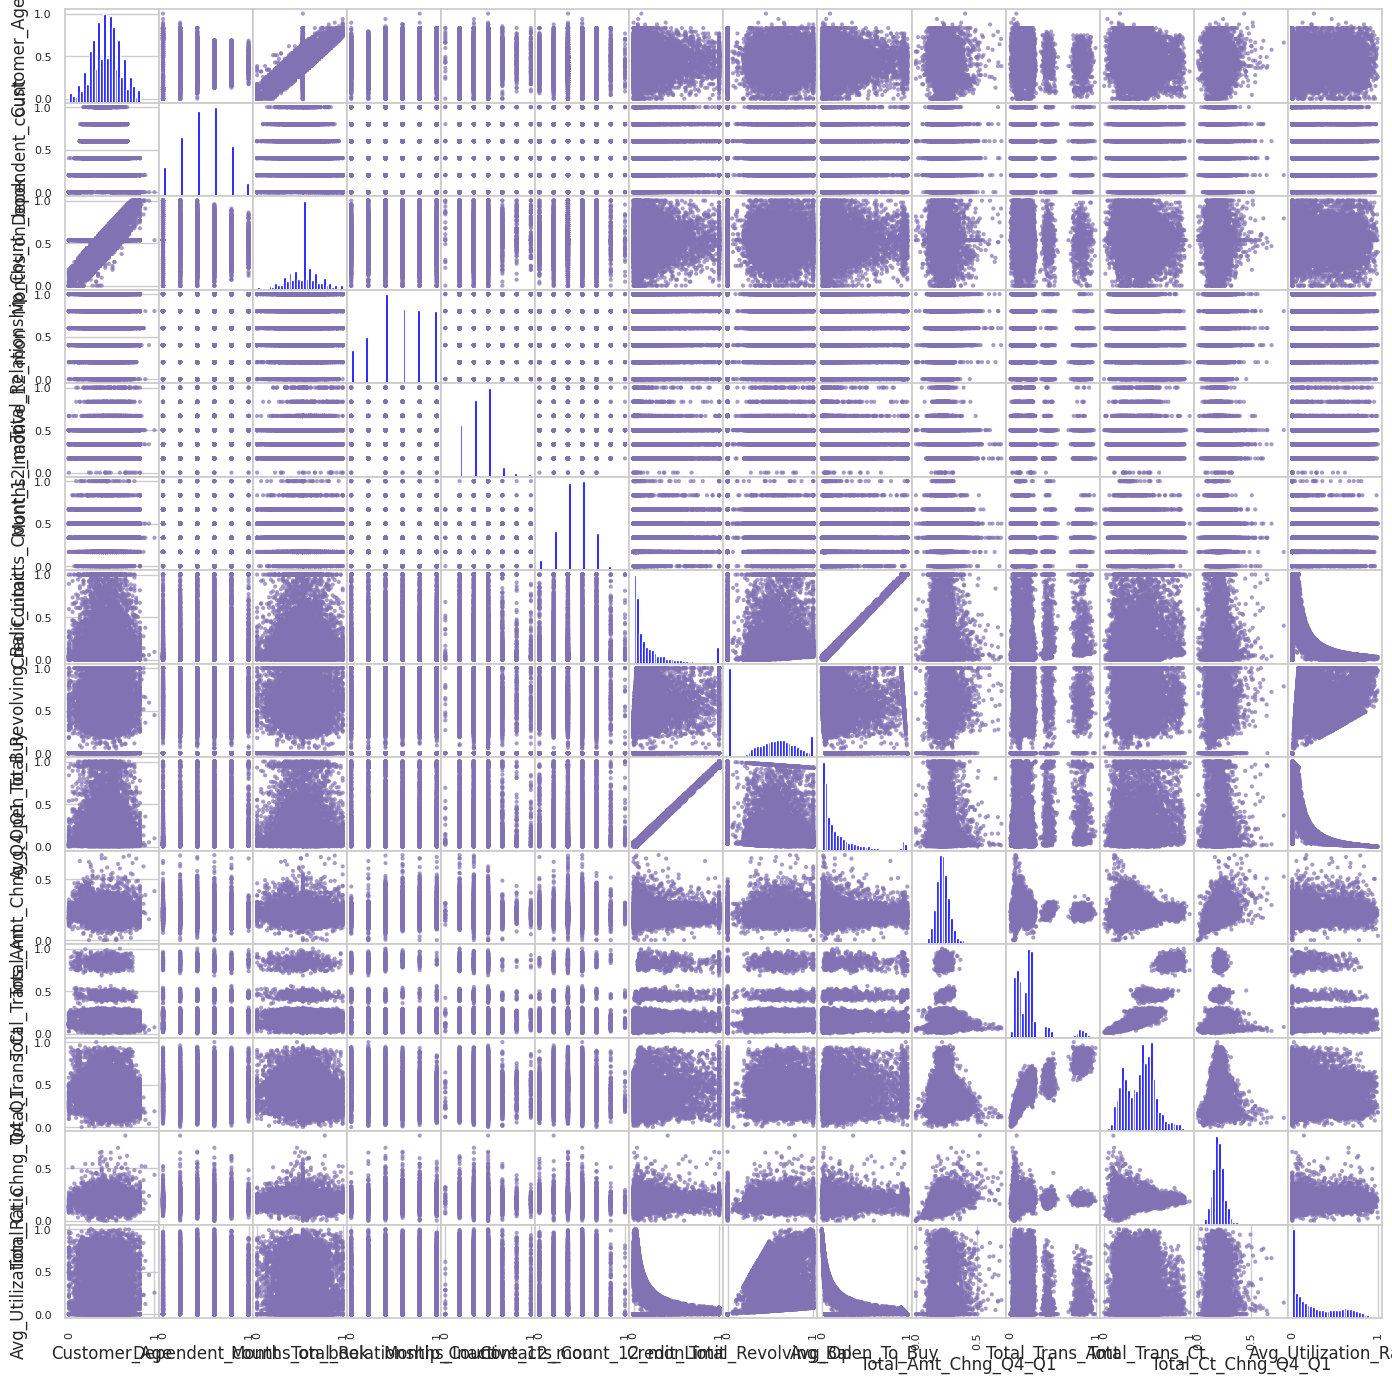

In [ ]:
#Se realiza una gráfica para observar la correlación de los datos
pd.plotting.scatter_matrix(Features, alpha=0.7, figsize=(17,17), range_padding = 0.1, diagonal='hist',
                           color = 'm', hist_kwds = {'bins':30, 'color':'blue'}) # Grafica de dispersión e histograma
plt.show()

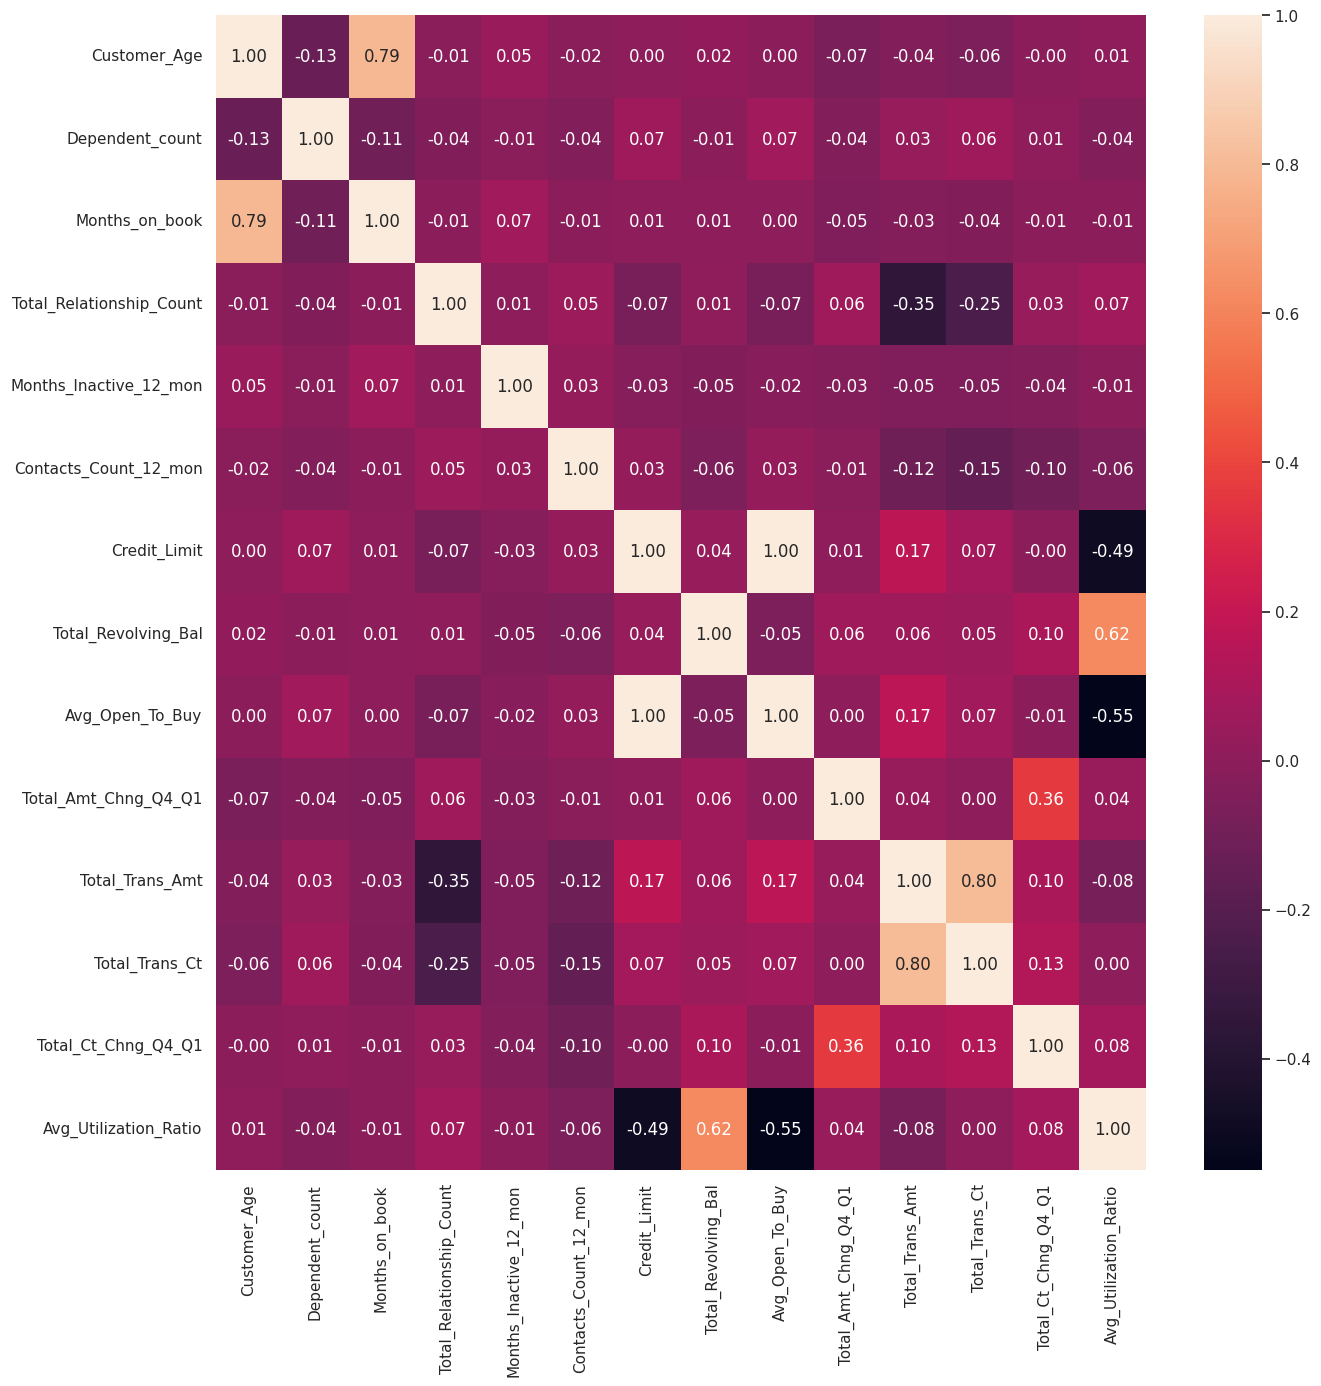

In [ ]:
Matriz_Correlacion = Features.corr()
Caracteristicas = Matriz_Correlacion.columns
plt.figure(figsize=(15,15))
ax = sns.heatmap(Matriz_Correlacion, annot=True, fmt='.2f', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

En la matriz de correlación se evidencia una relación entre las variables Customer_Age y Months_on_book > .7, sin embargo, tomamos la decisión de no eliminar ningúna característica.

** ELABORACIÓN DEL MODELO **

In [ ]:
DatosFiltrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9080 entries, 0 to 9113
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9080 non-null   float64
 1   Customer_Age              9080 non-null   float64
 2   Dependent_count           9080 non-null   float64
 3   Months_on_book            9080 non-null   float64
 4   Total_Relationship_Count  9080 non-null   float64
 5   Months_Inactive_12_mon    9080 non-null   float64
 6   Contacts_Count_12_mon     9080 non-null   float64
 7   Credit_Limit              9080 non-null   float64
 8   Total_Revolving_Bal       9080 non-null   float64
 9   Avg_Open_To_Buy           9080 non-null   float64
 10  Total_Amt_Chng_Q4_Q1      9080 non-null   float64
 11  Total_Trans_Amt           9080 non-null   float64
 12  Total_Trans_Ct            9080 non-null   float64
 13  Total_Ct_Chng_Q4_Q1       9080 non-null   float64
 14  Avg_Util

In [ ]:
catCols

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
# Especifica las columnas categóricas que deseas codificar
categorical_cols = DatosFiltrados[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
numerical_cols = DatosFiltrados[numCols]
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
categorical_cols = categorical_cols.apply(lambda col: le.fit_transform(col))

In [ ]:
Data_cod = pd.concat([categorical_cols,numerical_cols], axis=1 )

In [ ]:
Data_cod

Gender  Education_Level  Marital_Status  Income_Category  Card_Category  \
0          1                3               1                2              0   
3          2                6               3                6              4   
4          2                6               3                6              4   
5          1                2               1                1              0   
6          2                6               3                6              4   
...      ...              ...             ...              ...            ...   
9109       1                2               2                0              3   
9110       1                3               0                1              0   
9111       1                3               1                3              0   
9112       2                6               3                6              4   
9113       1                2               1                2              2   

      Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0                1.0      0.404255              0.6        0.604651   
3                1.0      0.382979              0.4        0.534884   
4                1.0      0.127660              0.0        0.325581   
5                1.0      0.468085              0.4        0.534884   
6                1.0      0.340426              1.0        0.418605   
...              ...           ...              ...             ...   
9109             1.0      0.595745              0.2        0.488372   
9110             1.0      0.638298              0.2        0.860465   
9111             1.0      0.510638              0.4        0.627907   
9112             0.0      0.319149              0.4        0.279070   
9113             0.0      0.085106              0.4        0.534884   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                          0.8                0.166667               0.500000   
3                          0.4                0.166667               0.333333   
4                          0.2                0.333333               0.333333   
5                          1.0                0.500000               0.500000   
6                          0.8                0.500000               0.333333   
...                        ...                     ...                    ...   
9109                       0.8                0.333333               0.000000   
9110                       0.6                0.166667               0.666667   
9111                       0.4                0.333333               0.500000   
9112                       0.6                0.333333               0.500000   
9113                       0.6                0.500000               0.500000   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0         0.340190             0.308701         0.345116   
3         0.077747             0.495431         0.079970   
4         0.835690             0.554629         0.802075   
5         0.308900             0.666269         0.289051   
6         0.160522             0.582837         0.152928   
...            ...                  ...              ...   
9109      0.377949             0.837902         0.342711   
9110      0.068013             0.240763         0.089213   
9111      0.077536             0.735399         0.062266   
9112      0.085819             0.868494         0.060499   
9113      0.116172             0.000000         0.152928   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                 0.392994         0.037559        0.248062   
3                 0.405063         0.034242        0.108527   
4                 0.648808         0.060900        0.201550   
5                 0.448631         0.055154        0.170543   
6                 0.244628         0.040936        0.248062   
...                    ...              ...             ...   
9109              0.194289         0.892595  

In [ ]:
vDep = list(Data_cod.columns)

#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = Data_cod.drop(columns ='Attrition_Flag')
y = Data_cod['Attrition_Flag']

In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

Creación y Entrenamiento Del Modelo

In [ ]:
modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
modelRanForest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=0).fit(X_train, y_train)
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Evaluación del modelo

In [ ]:
y_SVC      = modelSVC.predict(X_test)
y_LR       = modelLR.predict(X_test)
y_knn      = modelknn.predict(X_test)
y_ComplNB  = modelComplNB.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)
y_RanForest= modelRanForest.predict(X_test)
y_NN      = ModelNN.predict(X_test)

Exactitud

In [ ]:
print("="*5 + f" Accuracy de los modelos " + "="*20)
print()
print("modelSVC      :",metrics.accuracy_score(y_test, y_SVC      ))
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelknn      :",metrics.accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",metrics.accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",metrics.accuracy_score(y_test, y_RanForest))
print("ModelNN       :",metrics.accuracy_score(y_test, y_NN      ))

===== Accuracy de los modelos ====================

modelSVC      : 0.9069383259911894
modelLR       : 0.9069383259911894
modelknn      : 0.8568281938325991
modelComplNB  : 0.710352422907489
modelTreeClas : 0.9394273127753304
modelRanForest: 0.9465859030837004
ModelNN       : 0.8474669603524229


De acuerdo a los números anteriores, se creará el modelo RandomForest ya que da los mejores números.

In [ ]:
# Grid Search basado en out-of-bag score
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:


    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )

    modelo.fit(X_train, y_train)


    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-71-5debd733a94b>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


In [ ]:
resultados.head(30)

oob_accuracy criterion  max_depth  max_features  n_estimators
14      0.966960   entropy        NaN             9           150
23      0.966685   entropy       20.0             9           150
13      0.966685   entropy        NaN             7           150
10      0.966410      gini       20.0             7           150
1       0.966410      gini        NaN             7           150
22      0.966272   entropy       20.0             7           150
11      0.966134      gini       20.0             9           150
2       0.965859      gini        NaN             9           150
20      0.965859   entropy       10.0             9           150
19      0.964895   entropy       10.0             7           150
12      0.964207   entropy        NaN             5           150
9       0.963794      gini       20.0             5           150
21      0.963519   entropy       20.0             5           150
0       0.963381      gini        NaN             5           150
8       0.962830      gini       10.0             9           150
18      0.962555   entropy       10.0             5           150
7       0.962142      gini       10.0             7           150
6       0.960077      gini       10.0             5           150
3       0.910793      gini        3.0             5           150
15      0.910380   entropy        3.0             5           150
4       0.909279      gini        3.0             7           150
16      0.907764   entropy        3.0             7           150
5       0.907764      gini        3.0             9           150
17      0.906388   entropy        3.0             9           150

Grid Search basado en validación cruzada

In [ ]:
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


param_criterion param_max_depth param_max_features param_n_estimators  \
23         entropy              20                  9                150   
14         entropy            None                  9                150   
13         entropy            None                  7                150   
22         entropy              20                  7                150   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
23         0.966823        0.003575               1.0              0.0  
14         0.966823        0.003575               1.0              0.0  
13         0.966685        0.002368               1.0              0.0  
22         0.966410        0.002515               1.0              0.0

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} : 0.9668225140727174 accuracy


In [ ]:
modelo_final = grid.best_estimator_

In [ ]:
modelo_final

RandomForestClassifier(criterion='entropy', max_features=9, n_estimators=150,
                       random_state=123)

In [ ]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final.predict(X_test)

In [ ]:
y_pred

array([1., 0., 1., ..., 1., 0., 1.])

Evaluación del modelo

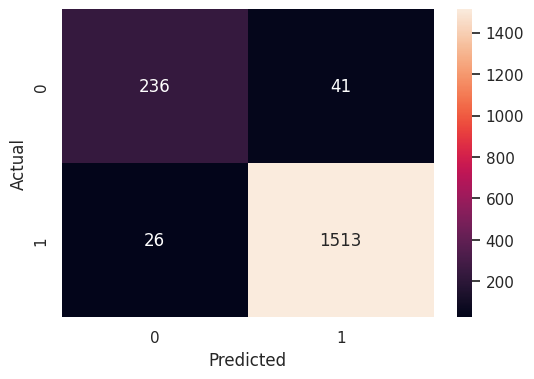

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       277
         1.0       0.97      0.98      0.98      1539

    accuracy                           0.96      1816
   macro avg       0.94      0.92      0.93      1816
weighted avg       0.96      0.96      0.96      1816



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

**Afinando el modelo (tuning)**

In [ ]:
# Creación del modelo randomForest con 20 arboles y 9 niveles de profundidad
modelo2 = RandomForestClassifier(
            n_estimators =  20,
            max_features =  'auto',
            class_weight = "balanced",
            max_depth    =  7,
            criterion    = 'gini'
         )


# Entrenamiento del modelo

modelo2.fit(X_train, y_train)

<ipython-input-80-d5d00e3982e1>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo2.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(class_weight='balanced', max_depth=7,
                       max_features='auto', n_estimators=20)

** Evaluación del modelo **

In [ ]:
# Ejecución del modelo con los datos de test
y_pred2 = modelo2.predict(X_test)

print("Random Forest:",metrics.accuracy_score(y_test, y_pred2))
print(metrics.classification_report(y_test, y_pred))

Random Forest: 0.9405286343612335
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       277
         1.0       0.97      0.98      0.98      1539

    accuracy                           0.96      1816
   macro avg       0.94      0.92      0.93      1816
weighted avg       0.96      0.96      0.96      1816



** Prueba **

In [ ]:
# Se extraen 10 ejemplos de los datos de test para probar una ejecución del modelo

x_i = X_test.sample(n=10)

x_i

Gender  Education_Level  Marital_Status  Income_Category  Card_Category  \
7156       1                2               2                2              0   
8538       1                3               2                1              0   
435        0                2               1                1              0   
6152       1                3               0                3              0   
5826       0                5               1                5              0   
3627       0                2               1                5              0   
8425       0                3               1                1              0   
3921       1                5               2                3              0   
8186       0                3               2                5              0   
7126       0                3               1                5              0   

      Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
7156      0.255319              0.6        0.325581                       0.2   
8538      0.212766              0.8        0.534884                       0.0   
435       0.468085              0.6        0.651163                       0.6   
6152      0.638298              0.6        0.720930                       1.0   
5826      0.340426              0.4        0.395349                       0.8   
3627      0.404255              0.8        0.511628                       0.4   
8425      0.340426              0.4        0.511628                       0.2   
3921      0.404255              0.4        0.581395                       0.6   
8186      0.340426              0.6        0.534884                       0.0   
7126      0.148936              0.6        0.186047                       0.2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
7156                0.500000               0.500000      0.027955   
8538                0.500000               0.500000      0.800863   
435                 0.166667               0.500000      0.238762   
6152                0.500000               0.666667      0.003196   
5826                0.500000               0.333333      0.013898   
3627                0.666667               0.333333      0.222407   
8425                0.166667               0.500000      0.053683   
3921                0.333333               0.500000      1.000000   
8186                0.166667               0.333333      0.867010   
7126                0.166667               0.500000      0.042104   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
7156             0.807708         0.009475              0.146600   
8538             0.754072         0.754151              0.213424   
435              0.664283         0.221974              0.204887   
6152             0.000000         0.044650              0.092729   
5826             0.288041         0.033900              0.195467   
3627             1.000000         0.181816              0.183986   
8425             0.584426         0.050416              0.274654   
3921             0.558602         0.959262              0.371210   
8186             0.845848         0.810854              0.226376   
7126             0.463647         0.048127              0.219017   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
7156         0.201066        0.434109             0.164243   
8538         0.843898        0.875969             0.197092   
435          0.052192        0.224806             0.168282   
6152         0.082464        0.193798             0.107701   
5826         0.269017        0.418605             0.286753   
3627         0.239455        0.550388             0.158320   
8425         0.832168        0.806202             0.175552   
3921         0.167773        0.410853             0.260905   
8186         0.439573        0.627907             0.145934   
7126         0.234005        0.426357             0.230749   

      Avg_Utilization_Ratio  


In [ ]:
# Se ejecuta la predicción
modelo2.predict(x_i)

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1.])